In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from keras.models import Sequential
from keras.optimizers import Adam
import category_encoders as ce
from imblearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier

df = pd.read_csv('credit_card_approval.csv')


2024-01-26 01:36:47.238407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [3]:
print(df.shape)
print(df.isnull().sum())
print(df.info(show_counts=True, verbose=True))
df.describe()

(537667, 19)
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     53766

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
count,5.376670e+05,5.376670e+05,537667.000000,537667.000000,537667.0,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000
mean,5.079231e+06,1.971171e+05,-15010.958999,-2762.029935,1.0,0.281615,0.298893,0.100730,-19.305241,0.003649
std,4.200200e+04,1.041390e+05,3416.418092,2393.919456,0.0,0.449787,0.457773,0.300971,14.037827,0.060298
min,5.008806e+06,2.700000e+04,-24611.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,5.044925e+06,1.350000e+05,-17594.000000,-3661.000000,1.0,0.000000,0.000000,0.000000,-29.000000,0.000000
50%,5.079091e+06,1.800000e+05,-14785.000000,-2147.000000,1.0,0.000000,0.000000,0.000000,-17.000000,0.000000
75%,5.115755e+06,2.295000e+05,-12239.000000,-1050.000000,1.0,1.000000,1.000000,0.000000,-8.000000,0.000000
max,5.150487e+06,1.575000e+06,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000


In [4]:
df.drop(df.columns[0], axis=1, inplace=True)
print(df.shape)
df.head()

(537667, 18)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


['F' 'M']


<AxesSubplot:ylabel='CODE_GENDER'>

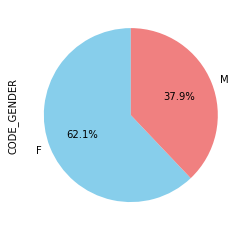

In [5]:
print(df['CODE_GENDER'].unique())
df['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

['N' 'Y']


<AxesSubplot:ylabel='FLAG_OWN_REALTY'>

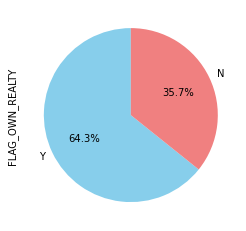

In [6]:
print(df['FLAG_OWN_REALTY'].unique())
df['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

[1]
(537667, 17)


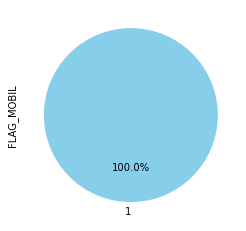

In [7]:
print(df['FLAG_MOBIL'].unique())
df['FLAG_MOBIL'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
df = df.drop("FLAG_MOBIL", axis=1)
print(df.shape)

#dropped cause no additional knowledge

['With parents' 'House / apartment' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']


<AxesSubplot:>

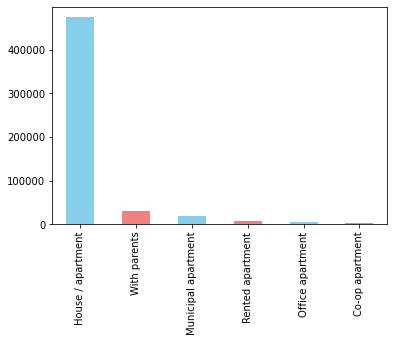

In [8]:
print(df['NAME_HOUSING_TYPE'].unique())
df['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])

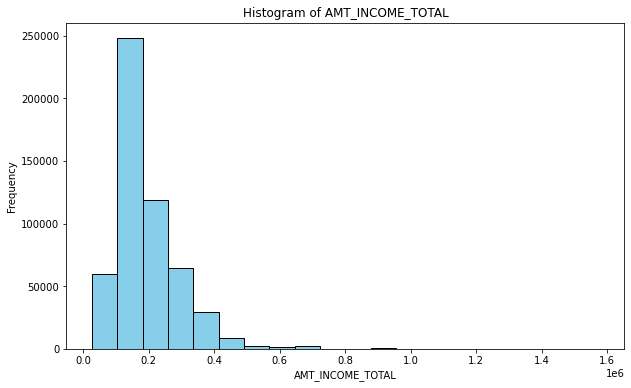

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['AMT_INCOME_TOTAL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Encoding catogerical varaibles and mapping out the encoding 
def encode_categorical_columns(df):
    label_encoder = LabelEncoder()
    encoding_mapping = {}

    for column_name in df.columns:
        if df[column_name].dtype == 'object':
            try:
                df[column_name] = label_encoder.fit_transform(df[column_name])
                encoding_mapping[column_name] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
                print(f"Column '{column_name}' successfully encoded.")
            except Exception as e:
                print(f"Error encoding column '{column_name}': {e}. Skipping.")
        else:
            print(f"Column '{column_name}' is not of type 'object'. Skipping.")

    return df, encoding_mapping
df_encoded, encoding_mapping = encode_categorical_columns(df)

for column, mapping in encoding_mapping.items():
    print(f"\nEncoding Mapping for Column '{column}':")
    print(pd.DataFrame(list(mapping.items()), columns=['Original Values', 'Encoded Values']))

Column 'CODE_GENDER' successfully encoded.
Column 'FLAG_OWN_CAR' successfully encoded.
Column 'FLAG_OWN_REALTY' successfully encoded.
Column 'CNT_CHILDREN' successfully encoded.
Column 'AMT_INCOME_TOTAL' is not of type 'object'. Skipping.
Column 'NAME_EDUCATION_TYPE' successfully encoded.
Column 'NAME_FAMILY_STATUS' successfully encoded.
Column 'NAME_HOUSING_TYPE' successfully encoded.
Column 'DAYS_BIRTH' is not of type 'object'. Skipping.
Column 'DAYS_EMPLOYED' is not of type 'object'. Skipping.
Column 'FLAG_WORK_PHONE' is not of type 'object'. Skipping.
Column 'FLAG_PHONE' is not of type 'object'. Skipping.
Column 'FLAG_EMAIL' is not of type 'object'. Skipping.
Column 'JOB' successfully encoded.
Column 'BEGIN_MONTHS' is not of type 'object'. Skipping.
Column 'STATUS' successfully encoded.
Column 'TARGET' is not of type 'object'. Skipping.

Encoding Mapping for Column 'CODE_GENDER':
  Original Values  Encoded Values
0               F               0
1               M               1



In [11]:
#Function for checking the distribution of the dataset 
def check_class_distribution_percentages(df):
    total_rows = df.shape[0]
    for column in df.columns:
        print(f"Column: {column}")
#binary
        if df[column].nunique() == 2:
            class_distribution = df[column].value_counts(normalize=True) * 100
            print(class_distribution)
        else:
#non binary 
            unique_values_count = df[column].nunique()
            if unique_values_count <= 10:
                class_distribution = df[column].value_counts(normalize=True) * 100
                print(class_distribution)
            else:
                print(f"Too many unique values ({unique_values_count}) for detailed output.")
 
check_class_distribution_percentages(df_encoded)

Column: CODE_GENDER
0    62.088988
1    37.911012
Name: CODE_GENDER, dtype: float64
Column: FLAG_OWN_CAR
0    56.95105
1    43.04895
Name: FLAG_OWN_CAR, dtype: float64
Column: FLAG_OWN_REALTY
1    64.253711
0    35.746289
Name: FLAG_OWN_REALTY, dtype: float64
Column: CNT_CHILDREN
2    63.822217
0    23.749830
1    12.427953
Name: CNT_CHILDREN, dtype: float64
Column: AMT_INCOME_TOTAL
Too many unique values (195) for detailed output.
Column: NAME_EDUCATION_TYPE
4    66.642922
1    28.599486
2     3.829508
3     0.847365
0     0.080719
Name: NAME_EDUCATION_TYPE, dtype: float64
Column: NAME_FAMILY_STATUS
1    71.420229
3    12.264841
0     8.198941
2     5.838930
4     2.277060
Name: NAME_FAMILY_STATUS, dtype: float64
Column: NAME_HOUSING_TYPE
1    88.191576
5     5.458955
2     3.352075
4     1.592249
3     0.773527
0     0.631618
Name: NAME_HOUSING_TYPE, dtype: float64
Column: DAYS_BIRTH
Too many unique values (5206) for detailed output.
Column: DAYS_EMPLOYED
Too many unique values (3299

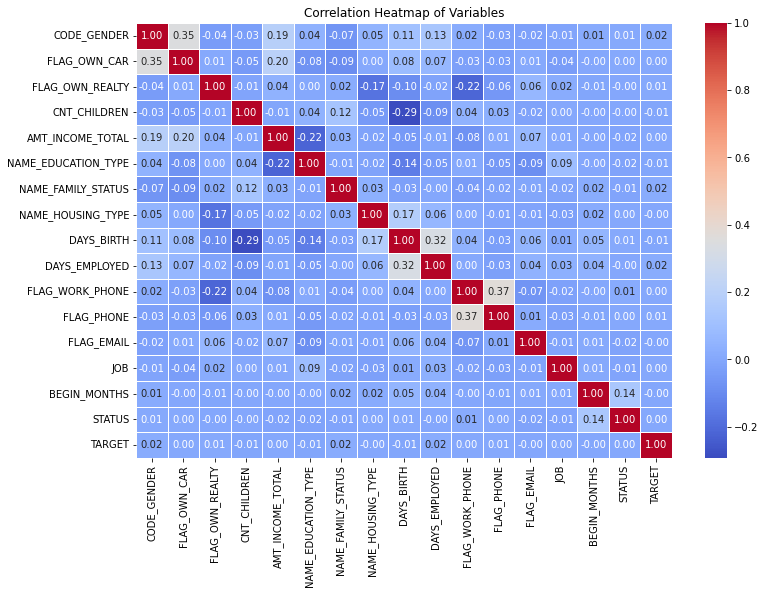

In [12]:
##Heat Map plot 
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [13]:
# split into train and test (there will be a further split into validation)
def split_data(df_encoded, test_size=0.3, random_state=None):
    X = df_encoded.drop(columns=['TARGET', 'STATUS']) ## Status is delated cause it basically gives the answer espacially for the already defaulted
    y = df_encoded['TARGET']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_encoded)

In [14]:
# metrics to call for all models 
def evaluations(y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics_dict = {
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': confusion_mat,
        'precision': precision,
        'recall': recall
    }

    return metrics_dict

def print_metrics(metrics_dict):
    print(f"Accuracy: {metrics_dict['accuracy']:.4f}")
    print("\nClassification Report:")
    print(metrics_dict['classification_report'])
    print("\nConfusion Matrix:")
    print(metrics_dict['confusion_matrix'])
    print(f"Precision: {metrics_dict['precision']:.4f}")
    print(f"Recall: {metrics_dict['recall']:.4f}")

In [15]:
# Under and over sampling
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Checking class distribution after sampling
num_observations_resampled = X_resampled.shape[0]
print(f'Number of observations after resampling: {num_observations_resampled}')

y_resampled_distribution = pd.Series(y_resampled).value_counts()
print("Class distribution after resampling:")
print(y_resampled_distribution)

Number of observations after resampling: 421863
Class distribution after resampling:
0    234368
1    187495
Name: TARGET, dtype: int64


In [16]:
# Function for under-sampling the target variable to balance the training dataset
#def undersample_with_random(X_train, y_train, random_state=42):
#    undersampler = RandomUnderSampler(random_state=random_state, sampling_strategy='auto')
#    X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
#   return X_train_undersampled, y_train_undersampled

#X_train_undersampled, y_train_undersampled = undersample_with_random(X_train, y_train)

#num_observations_undersampled = X_train_undersampled.shape[0]
#print(f'Number of observations in the undersampled data: {num_observations_undersampled}')

#y_train_distribution_undersampled = pd.Series(y_train_undersampled).value_counts()
#print("Class Distribution in y_train after under-sampling:")
#print(y_train_distribution_undersampled)

#check_class_distribution_percentages function call can be used here if needed
#check_class_distribution_percentages(X_train_undersampled)


In [17]:
##Oversampling the Target variable for a more balanced training dataset
#def oversample_with_smote(X_train, y_train, random_state=42):
#    smote = SMOTE(random_state=random_state, sampling_strategy='auto')
#    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
#    return X_train_oversampled, y_train_oversampled
#X_train_resampled, y_train_resampled = oversample_with_smote(X_train, y_train)

#num_observations = X_train_resampled.shape[0]
#print(f'Number of observations in the oversampled data: {num_observations}')

#y_train_distribution = pd.Series(y_train_resampled).value_counts()
#print("Class Distribution in y_train:")
#print(y_train_distribution)

#check_class_distribution_percentages(X_train_resampled)

In [18]:
##Logistic Regression - no 
###class weight included to make it more balanced

model_lro = LogisticRegression(class_weight='balanced', random_state=42)
model_lro.fit(X_train, y_train)

y_pred_lro = model_lro.predict(X_test)
metrics_dict_lro = evaluations(y_test, y_pred_lro)
print_metrics(metrics_dict_lro)

Accuracy: 0.4737

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64    160715
           1       0.01      0.74      0.01       586

    accuracy                           0.47    161301
   macro avg       0.50      0.61      0.33    161301
weighted avg       0.99      0.47      0.64    161301


Confusion Matrix:
[[75977 84738]
 [  150   436]]
Precision: 0.0051
Recall: 0.7440


In [19]:
# spliting the test into test and val so i can run few combinations 
def split_test_set(X_test, y_test, validation_size=0.5, random_state=None):
    X_validation, X_test, y_validation, y_test = train_test_split(
        X_test, y_test, test_size=validation_size, random_state=random_state
    )
    return X_validation, X_test, y_validation, y_test

X_val, X_test, y_val, y_test = split_test_set(X_test, y_test, validation_size=0.5, random_state=42)

In [20]:
##Nural Network Model
def create_regularized_nn_model(units=64, activation='relu', learning_rate=0.001, l2_strength=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, kernel_regularizer=regularizers.l2(l2_strength), input_dim=X_resampled.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [40]:
# Initial model 
units = 64
activation = 'relu'  
learning_rate = 0.001  
l2_strength = None 
dropout_rate = 0.5
epochs = 10
batch_size = 64

nn_model = create_regularized_nn_model(units=units, activation=activation, learning_rate=learning_rate, l2_strength=l2_strength, dropout_rate=dropout_rate)
nn_model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, verbose=1)
y_pred_nn = (nn_model.predict(X_val) > 0.5).astype('int32')
metrics_dict_nn = evaluations(y_val, y_pred_nn) 
print_metrics(metrics_dict_nn)

Epoch 1/10
6592/6592 [==============================] - 7s 988us/step - loss: 387.9081 - accuracy: 0.5234
Epoch 2/10
6592/6592 [==============================] - 7s 989us/step - loss: 0.7071 - accuracy: 0.5712
Epoch 3/10
6592/6592 [==============================] - 7s 1ms/step - loss: 0.6936 - accuracy: 0.5556
Epoch 4/10
6592/6592 [==============================] - 6s 967us/step - loss: 0.6878 - accuracy: 0.5556
Epoch 5/10
6592/6592 [==============================] - 6s 964us/step - loss: 0.6870 - accuracy: 0.5556
Epoch 6/10
6592/6592 [==============================] - 6s 969us/step - loss: 0.6870 - accuracy: 0.5556
Epoch 7/10
6592/6592 [==============================] - 6s 980us/step - loss: 0.6870 - accuracy: 0.5556
Epoch 8/10
6592/6592 [==============================] - 7s 995us/step - loss: 0.6870 - accuracy: 0.5556
Epoch 9/10
6592/6592 [==============================] - 7s 1ms/step - loss: 0.6870 - accuracy: 0.5556
Epoch 10/10
2521/2521 [==============================] - 2s 613us/

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [21]:
# relu and low learning rate 
units = 64
activation = 'relu'  
learning_rate = 0.001  
l2_strength = 0.01 
dropout_rate = 0.3 
epochs = 20 
batch_size = 128

nn_model = create_regularized_nn_model(units=units, activation=activation, learning_rate=learning_rate, l2_strength=l2_strength, dropout_rate=dropout_rate)
nn_model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, verbose=1)
y_pred_nn = (nn_model.predict(X_val) > 0.35).astype('int32')
metrics_dict_nn = evaluations(y_val, y_pred_nn) 
print_metrics(metrics_dict_nn)

Epoch 1/20
3296/3296 [==============================] - 5s 1ms/step - loss: 491.5466 - accuracy: 0.5255
Epoch 2/20
3296/3296 [==============================] - 5s 2ms/step - loss: 1.3983 - accuracy: 0.5504
Epoch 3/20
3296/3296 [==============================] - 5s 1ms/step - loss: 0.7097 - accuracy: 0.6052
Epoch 4/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.7014 - accuracy: 0.5832
Epoch 5/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.7115 - accuracy: 0.5812
Epoch 6/20
3296/3296 [==============================] - 5s 2ms/step - loss: 0.7200 - accuracy: 0.5558
Epoch 7/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.7104 - accuracy: 0.5556
Epoch 8/20
3296/3296 [==============================] - 5s 1ms/step - loss: 0.6876 - accuracy: 0.5556
Epoch 9/20
3296/3296 [==============================] - 5s 2ms/step - loss: 0.6871 - accuracy: 0.5556
Epoch 10/20
3296/3296 [==============================] - 7s 2ms/step - loss: 0.6

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
## NN with Sigmoid and higher learning rate 
units = 64 
activation = 'sigmoid'  
learning_rate = 0.0001  
l2_strength = 0.1
dropout_rate = 0.01
epochs = 20
batch_size = 64

nn_model = create_regularized_nn_model(units=units, activation=activation, learning_rate=learning_rate, l2_strength=l2_strength, dropout_rate=dropout_rate)
nn_model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, verbose=1)
y_pred_nn2 = (nn_model.predict(X_val) > 0.49).astype('int32')
metrics_dict_nn2 = evaluations(y_val, y_pred_nn2)
print_metrics(metrics_dict_nn2)


Epoch 1/20
6592/6592 [==============================] - 9s 1ms/step - loss: 1.0051 - accuracy: 0.5459
Epoch 2/20
6592/6592 [==============================] - 8s 1ms/step - loss: 0.6931 - accuracy: 0.5497
Epoch 3/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.6902 - accuracy: 0.5493
Epoch 4/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.6894 - accuracy: 0.5500
Epoch 5/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.6893 - accuracy: 0.5509
Epoch 6/20
6592/6592 [==============================] - 14s 2ms/step - loss: 0.6883 - accuracy: 0.5528
Epoch 7/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.6883 - accuracy: 0.5536
Epoch 8/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.6888 - accuracy: 0.5510
Epoch 9/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.6879 - accuracy: 0.5548
Epoch 10/20
6592/6592 [==============================] - 10s 2ms/step - los

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [23]:
## NN with Sigmoid 
units = 64 
activation = 'sigmoid'  
learning_rate = 0.01  
l2_strength = 0.2
dropout_rate = 0.2
epochs = 12
batch_size = 64

nn_model = create_regularized_nn_model(units=units, activation=activation, learning_rate=learning_rate, l2_strength=l2_strength, dropout_rate=dropout_rate)
nn_model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, verbose=1)
y_pred_nn2 = (nn_model.predict(X_val) > 0.9).astype('int32')
metrics_dict_nn2 = evaluations(y_val, y_pred_nn2)
print_metrics(metrics_dict_nn2)

Epoch 1/12
6592/6592 [==============================] - 10s 1ms/step - loss: 0.7604 - accuracy: 0.5384
Epoch 2/12
6592/6592 [==============================] - 10s 1ms/step - loss: 0.7577 - accuracy: 0.5392
Epoch 3/12
6592/6592 [==============================] - 10s 2ms/step - loss: 0.7699 - accuracy: 0.5387
Epoch 4/12
6592/6592 [==============================] - 11s 2ms/step - loss: 0.7517 - accuracy: 0.5391
Epoch 5/12
6592/6592 [==============================] - 11s 2ms/step - loss: 0.7606 - accuracy: 0.5385
Epoch 6/12
6592/6592 [==============================] - 11s 2ms/step - loss: 0.7550 - accuracy: 0.5393
Epoch 7/12
6592/6592 [==============================] - 13s 2ms/step - loss: 0.7526 - accuracy: 0.5390
Epoch 8/12
6592/6592 [==============================] - 12s 2ms/step - loss: 0.7552 - accuracy: 0.5389
Epoch 9/12
6592/6592 [==============================] - 12s 2ms/step - loss: 0.7630 - accuracy: 0.5384
Epoch 10/12
6592/6592 [==============================] - 14s 2ms/step - l

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/

In [24]:
# Initial XGBoost

xgb_model1 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', max_depth=3, learning_rate=0.1, n_estimators=100)
xgb_model1.fit(X_resampled, y_resampled)
y_pred_xgb1 = xgb_model1.predict(X_val)

metrics_dict_xgb1 = evaluations(y_val, y_pred_xgb1)
print_metrics(metrics_dict_xgb1)

Accuracy: 0.9162

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     80341
           1       0.03      0.64      0.06       309

    accuracy                           0.92     80650
   macro avg       0.51      0.78      0.51     80650
weighted avg       0.99      0.92      0.95     80650


Confusion Matrix:
[[73693  6648]
 [  112   197]]
Precision: 0.0288
Recall: 0.6375


In [25]:
## XGBoost Grid Search
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# basic model
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='recall', cv=3, verbose=1)
grid_search_xgb.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

#validation set
best_model_XGB = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_model_XGB.predict(X_val)
metrics_dict_best_xgb = evaluations(y_val, y_pred_best_xgb)
print_metrics(metrics_dict_best_xgb)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Score: 0.9984906219506264
Accuracy: 0.9879

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.21      0.75      0.32       309

    accuracy                           0.99     80650
   macro avg       0.60      0.87      0.66     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79442   899]
 [   76   233]]
Precision: 0.2058
Recall: 0.7540


In [41]:
##Random Forest sampled

rf_no = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_no.fit(X_resampled, y_resampled)
y_pred_rfno = rf_no.predict(X_val)
metrics_val_rfno = evaluations(y_val, y_pred_rfno)
print_metrics(metrics_val_rfno)

Accuracy: 0.9888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.22      0.73      0.33       309

    accuracy                           0.99     80650
   macro avg       0.61      0.86      0.66     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79516   825]
 [   82   227]]
Precision: 0.2158
Recall: 0.7346


In [27]:
##Random Forest - max features log2

rf_1 = RandomForestClassifier(max_features = 'log2', random_state=42, n_jobs=-1)
rf_1.fit(X_resampled, y_resampled)
y_pred_rf1 = rf_1.predict(X_val)
metrics_val_rf1 = evaluations(y_val, y_pred_rf1)
print_metrics(metrics_val_rf1)

Accuracy: 0.9888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.22      0.73      0.33       309

    accuracy                           0.99     80650
   macro avg       0.61      0.86      0.66     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79516   825]
 [   82   227]]
Precision: 0.2158
Recall: 0.7346


In [28]:
##Random Forest - max features sqrt

rf_2 = RandomForestClassifier(max_features = 'sqrt', random_state=42, n_jobs=-1)
rf_2.fit(X_resampled, y_resampled)
y_pred_rf2 = rf_2.predict(X_val)
metrics_val_rf2 = evaluations(y_val, y_pred_rf2)
print_metrics(metrics_val_rf2)

Accuracy: 0.9888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.22      0.73      0.33       309

    accuracy                           0.99     80650
   macro avg       0.61      0.86      0.66     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79516   825]
 [   82   227]]
Precision: 0.2158
Recall: 0.7346


In [29]:
### the max features is producing the exact same results so I am going with just the default one - sqrt

In [31]:
##Random Forest Model with first Grid Search

param_grid = {
    'min_samples_leaf': [1, 2, 4],    
    'criterion': ['gini', 'entropy']
}

##I have done check on min samples leaf and it came out as 1 and min samples leaf and it came out 10 so now I am
## doing min samples split on 10,15,20 and adding a parameter grid search for number of estimators  
##the second one was on min sample split and n estimators from which both highest values were decided so im going
## even higher
    ##Best Parameters: {'min_samples_split': 25, 'n_estimators': 300}}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'}

rf_gs1 = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1)
grid_search_rf1 = GridSearchCV(rf_gs1, param_grid,cv=3, scoring=scoring, n_jobs=-1, refit='recall')
grid_search_rf1.fit(X_resampled, y_resampled)

best_params_rf1 = grid_search_rf1.best_params_
best_rf1 = grid_search_rf1.best_estimator_

y_pred_val1 = best_rf1.predict(X_val)
metrics_val1 = evaluations(y_val, y_pred_val1)

print(f"Best Parameters: {best_params_rf1}")
print("Validation Metrics with Best Model:")
print_metrics(metrics_val1)

##the last grid search was with 300 n-estimators and 25 min samples split 

Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 4}
Validation Metrics with Best Model:
Accuracy: 0.9878

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.20      0.72      0.31       309

    accuracy                           0.99     80650
   macro avg       0.60      0.86      0.65     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79442   899]
 [   85   224]]
Precision: 0.1995
Recall: 0.7249


In [32]:
##Random Forest Model with Grid Search

param_grid = {
    'n_estimators': [200,300,350],  
    'min_samples_split': [20, 25, 35]}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'}

rf_gs2 = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1)
grid_search_rf2 = GridSearchCV(rf_gs2, param_grid,cv=3, scoring=scoring, n_jobs=-1, refit='recall')
grid_search_rf2.fit(X_resampled, y_resampled)

best_params_rf2 = grid_search_rf2.best_params_
best_rf2 = grid_search_rf2.best_estimator_

y_pred_val2 = best_rf2.predict(X_val)
metrics_val2 = evaluations(y_val, y_pred_val2)

print(f"Best Parameters: {best_params_rf2}")
print("Validation Metrics with Best Model:")
print_metrics(metrics_val2)

##the last grid search was with 300 n-estimators and 25 min samples split 

Best Parameters: {'min_samples_split': 25, 'n_estimators': 200}
Validation Metrics with Best Model:
Accuracy: 0.9888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80341
           1       0.21      0.70      0.32       309

    accuracy                           0.99     80650
   macro avg       0.60      0.85      0.66     80650
weighted avg       1.00      0.99      0.99     80650


Confusion Matrix:
[[79530   811]
 [   92   217]]
Precision: 0.2111
Recall: 0.7023


In [33]:
### FINAL MODELS 

In [34]:
## Neural Network 

# relu and low learning rate 
units = 64
activation = 'relu'  
learning_rate = 0.001  
l2_strength = 0.01 
dropout_rate = 0.3 
epochs = 20 
batch_size = 128

nn_model = create_regularized_nn_model(units=units, activation=activation, learning_rate=learning_rate, l2_strength=l2_strength, dropout_rate=dropout_rate)
nn_model.fit(X_resampled, y_resampled, epochs=epochs, batch_size=batch_size, verbose=1)
y_pred_nn = (nn_model.predict(X_test) > 0.35).astype('int32')
metrics_dict_nn = evaluations(y_test, y_pred_nn) 
print_metrics(metrics_dict_nn)

Epoch 1/20
3296/3296 [==============================] - 6s 2ms/step - loss: 399.3007 - accuracy: 0.5185
Epoch 2/20
3296/3296 [==============================] - 4s 1ms/step - loss: 2.3556 - accuracy: 0.5364
Epoch 3/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.7167 - accuracy: 0.5957
Epoch 4/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.6910 - accuracy: 0.5955
Epoch 5/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.6860 - accuracy: 0.5775
Epoch 6/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.6880 - accuracy: 0.5557
Epoch 7/20
3296/3296 [==============================] - 3s 1ms/step - loss: 0.7184 - accuracy: 0.5555
Epoch 8/20
3296/3296 [==============================] - 3s 1ms/step - loss: 0.7006 - accuracy: 0.5556
Epoch 9/20
3296/3296 [==============================] - 4s 1ms/step - loss: 0.6871 - accuracy: 0.5556
Epoch 10/20
3296/3296 [==============================] - 3s 1ms/step - loss: 0.6

/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oladurska/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
## XGBoost

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)
best_model_XGB = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_model_XGB.predict(X_test)
metrics_dict_best_xgb = evaluations(y_test, y_pred_best_xgb)
print_metrics(metrics_dict_best_xgb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Score: 0.9984906219506264
Accuracy: 0.9877

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80374
           1       0.19      0.77      0.30       277

    accuracy                           0.99     80651
   macro avg       0.59      0.88      0.65     80651
weighted avg       1.00      0.99      0.99     80651


Confusion Matrix:
[[79441   933]
 [   63   214]]
Precision: 0.1866
Recall: 0.7726


In [36]:
## Random Forest 

print(f"Best Parameters: {best_params_rf1}")
print(f"Best Parameters: {best_params_rf2}")


Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 4}
Best Parameters: {'min_samples_split': 25, 'n_estimators': 200}


In [38]:
## Input the values for the final model 
rf_final = RandomForestClassifier(max_features = 'sqrt', n_estimators = 200, criterion = 'entropy', min_samples_split = 25, min_samples_leaf= 4, random_state=42, n_jobs=-1)
rf_final.fit(X_resampled, y_resampled)
y_pred_rf_final = rf_final.predict(X_test)
metrics_val_rf_final = evaluations(y_test, y_pred_rf_final)
print_metrics(metrics_val_rf_final)

Accuracy: 0.9874

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80374
           1       0.18      0.75      0.29       277

    accuracy                           0.99     80651
   macro avg       0.59      0.87      0.64     80651
weighted avg       1.00      0.99      0.99     80651


Confusion Matrix:
[[79426   948]
 [   68   209]]
Precision: 0.1806
Recall: 0.7545
